<h2 style="color:MediumVioletRed; font-family:Cursive"><b>Goal of creating this Notebook🎯</h2>

1. Perform Clustering / Segmentation on the dataset and identify popular customer groups along with their definitions/rules
2. Perform Location-wise analysis to identify regional trends in India
3. Perform transaction-related analysis to identify interesting trends that can be used by a bank to improve / optimi their user experiences
4. Customer Recency, Frequency, Monetary analysis
5. Network analysis or Graph analysis of customer data.

**Table of contents of this notebook: 📭**

1. [Importing Necessary Libraries](#1)

2. [Data Collection](#2)

3. [Data Cleaning](#3)

4. [Exploratory Data Analysis](#4)

<h2  style="color:darkmagenta;text-align: center; background-color: AliceBlue;padding: 20px;">1. Importing Libraries</h2><a id = "1"></a>

In [2]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns

<h2  style="color:darkmagenta;text-align: center; background-color: AliceBlue;padding: 20px;">2. Data Collection</h2><a id = "2"></a>

In [3]:
"""
Suma dos números.
:param a: Primer número.
:type a: int
:param b: Segundo número.
:type b: int
:return: Resultado de la suma.
:rtype: int
"""
df = pd.read_csv("../../data/bank_transactions.csv")
initialRows = len(df)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
df = df.rename(columns={'TransactionAmount (INR)':'TransactionAmount'})

In [5]:
df.shape

(1048567, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   TransactionID       1048567 non-null  object 
 1   CustomerID          1048567 non-null  object 
 2   CustomerDOB         1045170 non-null  object 
 3   CustGender          1047467 non-null  object 
 4   CustLocation        1048416 non-null  object 
 5   CustAccountBalance  1046198 non-null  float64
 6   TransactionDate     1048567 non-null  object 
 7   TransactionTime     1048567 non-null  int64  
 8   TransactionAmount   1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


<h2  style="color:darkmagenta;text-align: center; background-color: AliceBlue;padding: 20px;">3. Data Cleaning</h2><a id = "3"></a>

<h4>The amount of null data and duplicated is calculated</h4>

In [7]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,TransactionID,object,1048567,0
1,CustomerID,object,884265,0
2,CustomerDOB,object,17254,3397
3,CustGender,object,3,1100
4,CustLocation,object,9355,151
5,CustAccountBalance,float64,161328,2369
6,TransactionDate,object,55,0
7,TransactionTime,int64,81918,0
8,TransactionAmount,float64,93024,0


In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

<h5>The CustomerDOB column is analyzed because it may contain atypical data.</h5>

In [10]:
# Getting distinct values from CustomerDOB variable
df['CustomerDOB'].value_counts()

1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
2/12/51         1
20/3/52         1
26/9/47         1
4/10/41         1
24/10/44        1
Name: CustomerDOB, Length: 17233, dtype: int64

<h5>Dates 1/1/1800 are deleted because it is not possible to define whether they are children, adults or persons without date of birth.</h5>

In [11]:
# Removing CustomerDOB == '1/1/1800'
df = df.loc[~(df['CustomerDOB'] == '1/1/1800')]
# Cheking distinct values from dataframe
df['CustomerDOB'].value_counts()

1/1/89      809
1/1/90      784
6/8/91      698
1/1/91      665
1/1/92      631
           ... 
23/2/05       1
28/11/42      1
23/9/49       1
14/3/40       1
24/10/44      1
Name: CustomerDOB, Length: 17232, dtype: int64

In [12]:
# Range of CustomerDOB object type as string
print("min: " + df['CustomerDOB'].min() + " max: " + df['CustomerDOB'].max())

min: 1/1/00 max: 9/9/97


<h5>Determine minority group of people aged <b> over 100 years</b> </h5>

254


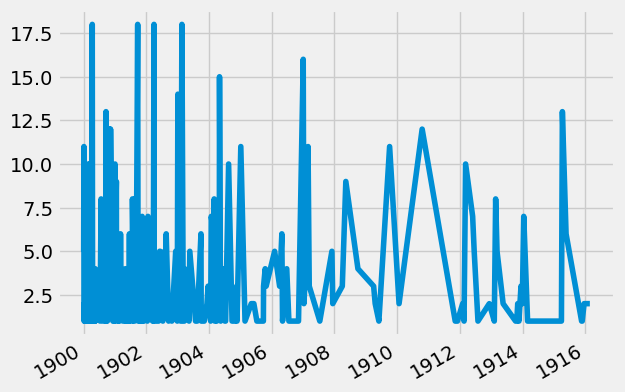

In [81]:
# We filter our dataframe specifically on the DOB column to make a decision regarding date ambiguity.
df_filtered = df["CustomerDOB"].apply(lambda x: x if x.year < 1917 else 0)
# Amortizing and removing values ​​greater than 1917 represented as 0
counts = df_filtered.value_counts().drop(0)
# Amount of customer in this age range
print(len(counts))
# Plot the amortized
counts.plot()
plt.show()

<h5>Convert type of columns TransactionDate, CustomerDOB from string to datetime.</h5>

In [55]:
# Using pandas convert to datetime tool for CustomerDOB variable with specific format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], dayfirst=True)

In [14]:
# Checking converting problem of to_datetime pandas function
print(df['CustomerDOB'].min(), df['CustomerDOB'].max())

1973-01-01 00:00:00 2072-12-31 00:00:00


In [79]:
# Fixing the problem base on analysis above
df.loc[df['CustomerDOB'].dt.year > 1999, 'CustomerDOB'] -= pd.DateOffset(years=100)

In [80]:
# Checking range of CustomerDOB variable
print(df['CustomerDOB'].min(), df['CustomerDOB'].max())

1900-01-01 00:00:00 1999-12-28 00:00:00


In [17]:
# Using pandas convert to datetime tool for TransactionDate variable
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [18]:
# Checking range of TransactionDate variable
print(df['TransactionDate'].min(), df['TransactionDate'].max())

2016-01-08 00:00:00 2016-12-09 00:00:00


<h4> Calculate customer age :</h4>
<h6> CustomerDOB is the birth date of the customer , TransactionDate : is the date of transaction that customer is done
</h6>

In [19]:
# Getting the customer age at transaction moment and adding a new column in our dataframe
df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

In [82]:
# Checking range of CustomerAge variable
print("min: " + str(df['CustomerAge'].min()) + " max: " + str(df['CustomerAge'].max()))

min: 16 max: 115


In [83]:
# Getting distinct values from CustGender variable
df.CustGender.value_counts()

M    712454
F    272868
Name: CustGender, dtype: int64

In [22]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)

<h5> Visualize the distribution of the numeric data and detect posible outliers. Boxplots show the median, quartiles, and extreme values ​​of the data, and points that are above or below the extreme values ​​are considered outliers.</h5>

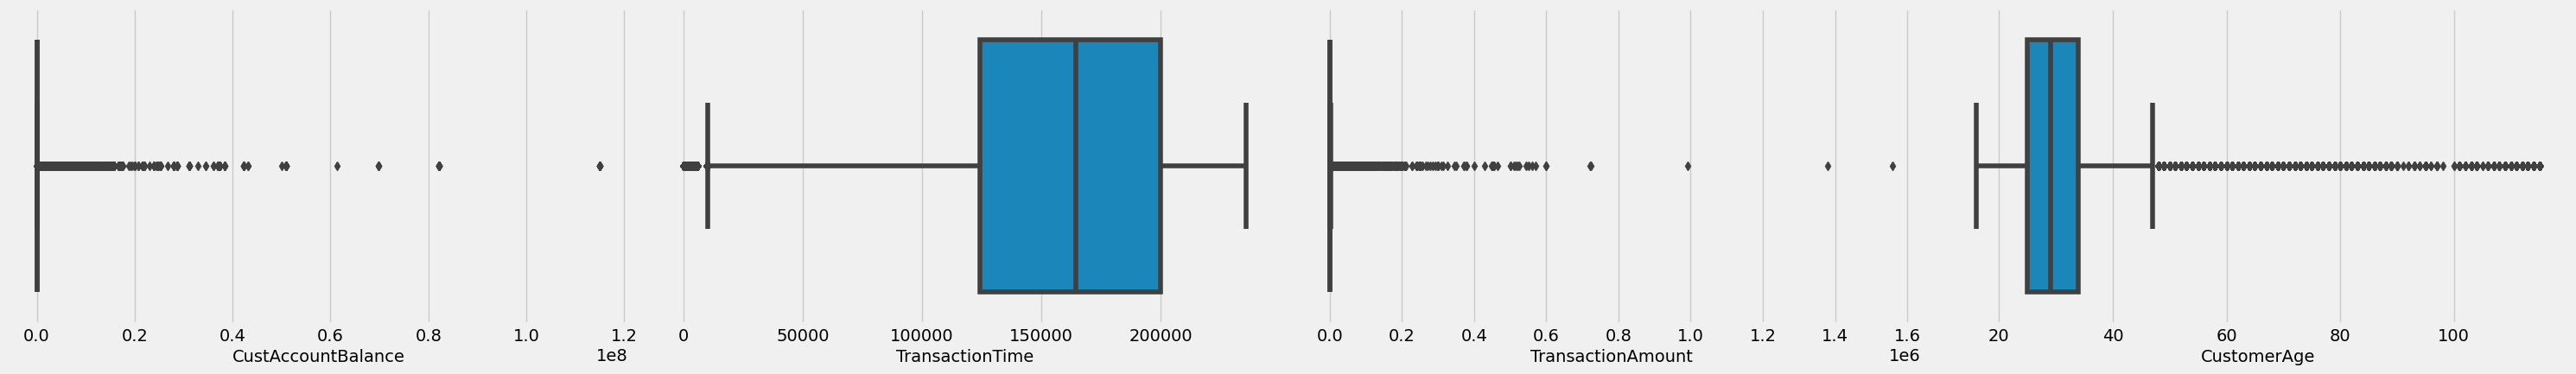

In [23]:
# Setting Figure specific sizes
plt.figure(figsize=(30,30))
# Creating boxplot 
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    sns.boxplot(data=num_col,x=column)
    
plt.tight_layout(pad = 1.0)

In [85]:
print("Number of initial rows: ", initialRows)
print("Number of rows after: ", df.shape[0])
print("Number of rows deleted: ", initialRows - df.shape[0])
print("Percentage of rows deleted: ", (initialRows - df.shape[0]) / initialRows * 100, "%")

Number of initial rows:  1048567
Number of rows after:  985322
Number of rows deleted:  63245
Percentage of rows deleted:  6.03156498344884 %


<h3 style="color:MediumVioletRed; font-family:Cursive">Observations 💡:</h3>
<p>We will not remove outliers for the following two reasons: First, in boxplots those values ​​can be outliers because they represent points that are above or below extreme values. However, these were not measurement errors and are both true and significant, given that while customers 100+ do not represent a key demographic for most banks. Secoind it is important that banks are aware of the specific needs and challenges that these clients may face, and that they adapt their strategies accordingly.</p>

<img src="https://miro.medium.com/max/638/0*JddVeZpHXdElEec_" alt="RFM" >
<p style="color:DarkSlateGray">those two articles will help you to understand this topic 📜:</p>
<a href="https://connectif.ai/en/what-are-rfm-scores-and-how-to-calculate-them/">What Are RFM Scores and How To Calculate Them</a>
<br>
<a href="https://www.datacamp.com/tutorial/introduction-customer-segmentation-python">Introduction to Customer Segmentation in Python</a>

<p>Recency: number of days since the last purchase or order so we will create a new column of TransactionDate to subtract the last transaction from the first transaction</p>

In [25]:
df['TransactionDate1']=df['TransactionDate'] # ==> to calculate the minimum (first transaction)
df['TransactionDate2']=df['TransactionDate'] # ==> to calculate the maximum (last transaction)

In [92]:
#Creating MRF Table Strategy
RFM_df = df.groupby("CustomerID").agg({
                                        "TransactionID" : "count",
                                        "CustGender" : "first",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "mean",
                                        "TransactionTime": "mean",
                                        "TransactionAmount" : "mean",
                                        "CustomerAge" : "median",
                                        "TransactionDate2":"max",
                                        "TransactionDate1":"min",
                                        "TransactionDate":"median"
                        })

RFM_df = RFM_df.reset_index()
RFM_df.head()

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount,CustomerAge,TransactionDate2,TransactionDate1,TransactionDate
0,C1010011,2,F,NOIDA,76340.635,67521.0,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17
1,C1010012,1,M,MUMBAI,24204.490,204409.0,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14
2,C1010014,2,F,MUMBAI,100112.950,187378.0,727.5,28.0,2016-07-08,2016-01-08,2016-04-08
3,C1010018,1,F,CHAMPARAN,496.180,170254.0,30.0,26.0,2016-09-15,2016-09-15,2016-09-15
4,C1010024,1,M,KOLKATA,87058.650,141103.0,5000.0,51.0,2016-08-18,2016-08-18,2016-08-18


In [93]:
# After Grouping by CustomerID
RFM_df.shape

(839081, 11)

In [28]:
# The id of the customer is irrelevant
RFM_df.drop(columns=["CustomerID"],inplace=True)

In [29]:
# Renaming specific column adapting to problem goal and replacing with inplace property of function
RFM_df.rename(columns={"TransactionID":"Frequency"},inplace=True)

In [96]:
# Getting Recency that is by definition: number of days since the last purchase or order
RFM_df['Recency']=RFM_df['TransactionDate2']-RFM_df['TransactionDate1']
# Conversion from timedelta64[ns] to string representtion in days of weeks of Recency variable
RFM_df['Recency']=RFM_df['Recency'].astype(str)

In [32]:
# Using re library for apply an regular expresion in each value of Recency column for extract the number of days in this string representation. 
RFM_df['Recency']=RFM_df['Recency'].apply(lambda x :re.search('\d+',x).group())
# Conversion from string '18' to int representtion for folloeing operations
RFM_df['Recency']=RFM_df['Recency'].astype(int)

<p> <b>Appreciation:</b> Days mean that a customer has done transaction recently one time by logic so I will convert 0 to 1 </p>

In [98]:
# Transformation of 0 days base on business meaning
RFM_df['Recency'] = RFM_df['Recency'].apply(lambda x: 1 if x == 0 else x)

In [34]:
# Columns that were only needed for the calculation we eliminated
RFM_df.drop(columns=["TransactionDate1","TransactionDate2"],inplace=True)

In [35]:
# To calculate the otliers for each feature
lower_list=[]
upper_list=[]
num_list=[]
perc_list=[]
cols=['Frequency', 'CustAccountBalance','TransactionAmount', 'CustomerAge', 'Recency']
for i in cols:
    Q1 = RFM_df[i].quantile(0.25)
    Q3 = RFM_df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Calculate number of outliers
    num=RFM_df[(RFM_df[i] < lower) | (RFM_df[i] > upper)].shape[0]
    # Calculate percentage of outliers
    perc = (num / RFM_df.shape[0]) * 100
    lower_list.append(lower)
    upper_list.append(upper)
    num_list.append(num)
    perc_list.append(round(perc,2))

    
dic={'lower': lower_list, 'upper': upper_list, 'outliers': num_list, 'Perc%':perc_list }
outliers_df=pd.DataFrame(dic,index=['Frequency', 'CustAccountBalance','TransactionAmount', 'CustomerAge', 'Recency'])
outliers_df

,lower,upper,outliers,Perc%
Frequency,1.000,1.000,128896,15.36
CustAccountBalance,-72439.305,135042.015,110026,13.11
TransactionAmount,-1313.595,2669.325,87229,10.40
CustomerAge,11.500,47.500,42222,5.03
Recency,1.000,1.000,123525,14.72


<p>May Some variables seem like outliers but they are not, I decided spare any data.</p>

In [36]:
RFM_df.head()

,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount,CustomerAge,TransactionDate,Recency
0,2,F,NOIDA,76340.635,67521.0,2553.0,28.5,2016-09-17,18
1,1,M,MUMBAI,24204.490,204409.0,1499.0,22.0,2016-08-14,1
2,2,F,MUMBAI,100112.950,187378.0,727.5,28.0,2016-04-08,182
3,1,F,CHAMPARAN,496.180,170254.0,30.0,26.0,2016-09-15,1
4,1,M,KOLKATA,87058.650,141103.0,5000.0,51.0,2016-08-18,1


<h2  style="color:darkmagenta;text-align: center; background-color: AliceBlue;padding: 20px;">4. Exploratory Data Analysis</h2><a id = "4"></a>

In [37]:
RFM_df.describe()

,Frequency,CustAccountBalance,TransactionTime,TransactionAmount,CustomerAge,Recency
count,839081.000000,8.390810e+05,839081.000000,8.390810e+05,839081.000000,839081.000000
mean,1.174287,1.058545e+05,157446.381829,1.453624e+03,31.068668,15.132148
std,0.435129,7.862524e+05,49194.229430,6.045200e+03,8.600795,45.535132
min,1.000000,0.000000e+00,0.000000,0.000000e+00,16.000000,1.000000
25%,1.000000,5.366190e+03,125604.000000,1.800000e+02,25.000000,1.000000
50%,1.000000,1.768220e+04,163936.000000,4.750000e+02,29.000000,1.000000
75%,1.000000,5.723652e+04,194953.000000,1.175730e+03,34.000000,1.000000
max,6.000000,1.150355e+08,235959.000000,1.560035e+06,115.000000,336.000000


/tmp/ipykernel_1886261/3937467450.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=RFM_df.corr()


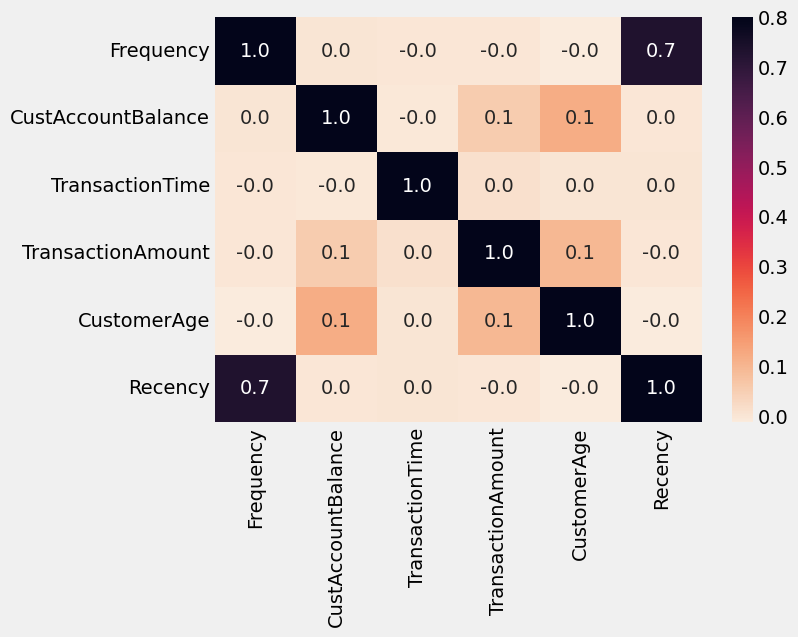

In [38]:
# correlation between features
plt.figure(figsize=(7,5))
correlation=RFM_df.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='rocket_r',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True);

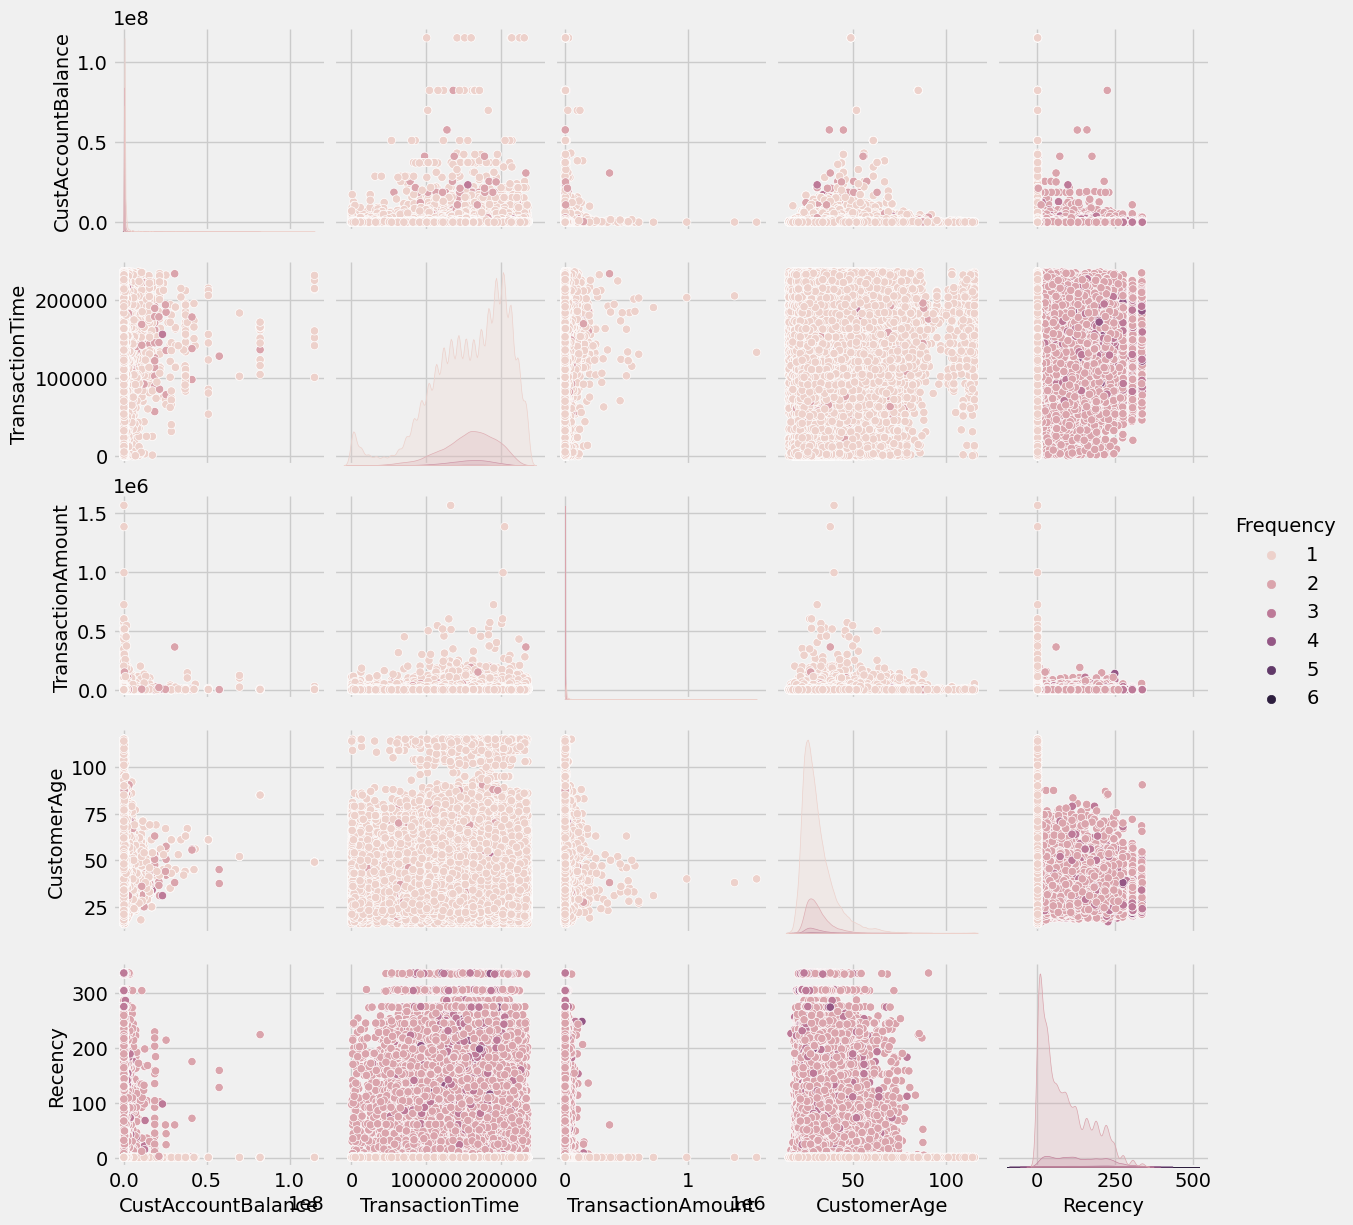

In [39]:
plt.style.use("fivethirtyeight")
sns.pairplot(RFM_df,hue='Frequency');

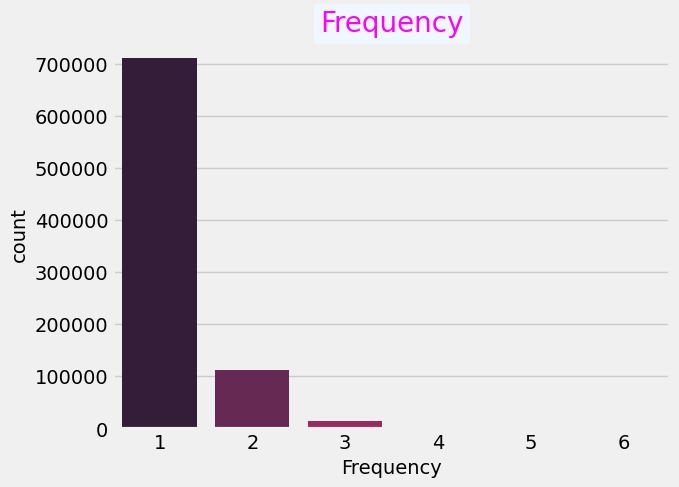

In [40]:
plt.style.use("fivethirtyeight")
chart=sns.countplot(x='Frequency',data=RFM_df,palette='rocket', order = RFM_df['Frequency'].value_counts().index)
plt.title("Frequency",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta');

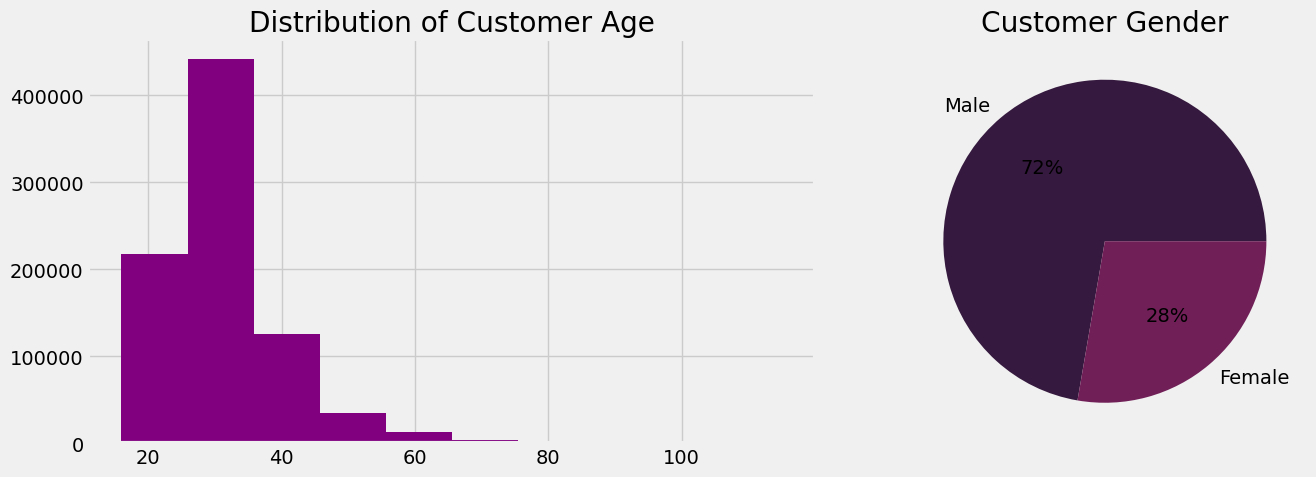

In [41]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
palette_color = sns.color_palette('rocket')
ax[0].hist(x=RFM_df['CustomerAge'],color='purple')
ax[0].set_title("Distribution of Customer Age")
ax[1].pie(RFM_df['CustGender'].value_counts(),autopct='%1.f%%',colors=palette_color,labels=['Male','Female'])
ax[1].set_title("Customer Gender")
plt.tight_layout();

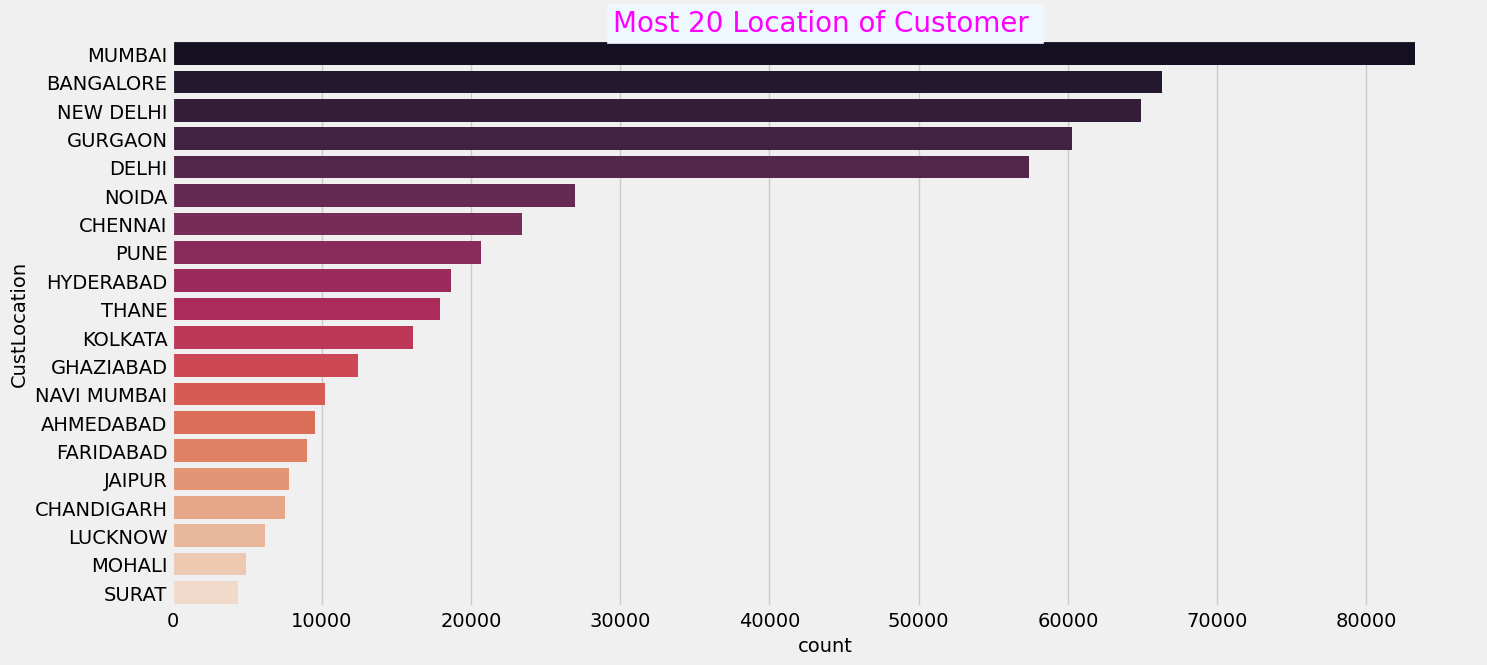

In [42]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,7))
chart=sns.countplot(y='CustLocation',data=RFM_df,palette='rocket', order = RFM_df['CustLocation'].value_counts()[:20].index)
plt.title("Most 20 Location of Customer ",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta');

/home/alejandro/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/alejandro/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


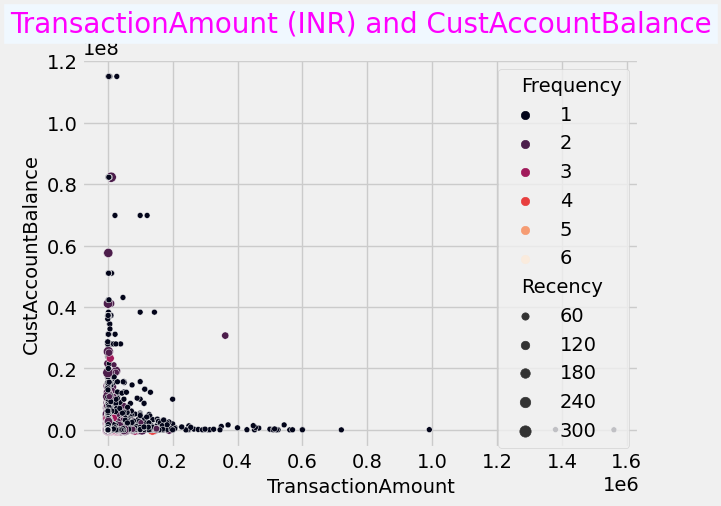

In [43]:
plt.style.use("fivethirtyeight")
sns.scatterplot(x='TransactionAmount',y='CustAccountBalance',data=RFM_df,palette='rocket',hue='Frequency',size='Recency' )
plt.title("TransactionAmount (INR) and CustAccountBalance",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta');

In [44]:
# difference between maximum and minimum date
RFM_df['TransactionDate'].max()-RFM_df['TransactionDate'].min()

Timedelta('336 days 00:00:00')

In [45]:
RFM_df=RFM_df.sort_values(by='TransactionDate')
groupbby_month=RFM_df.groupby([pd.Grouper(key='TransactionDate',freq='M')]).mean()
print(groupbby_month.shape)
groupbby_month

(12, 6)


/tmp/ipykernel_1886261/347716159.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupbby_month=RFM_df.groupby([pd.Grouper(key='TransactionDate',freq='M')]).mean()


,Frequency,CustAccountBalance,TransactionTime,TransactionAmount,CustomerAge,Recency
TransactionDate,,,,,,
2016-01-31,1.023535,99430.235124,157265.789770,1339.251024,30.834616,1.812399
2016-02-29,1.060922,93326.181885,158205.582772,1399.785006,30.849497,4.899824
2016-03-31,1.086487,103808.517021,158177.329631,1539.192142,31.066789,8.173665
2016-04-30,1.163838,105543.379683,157837.754316,1593.985274,31.051824,23.924108
2016-05-31,1.341184,100434.957463,157353.966707,1485.286222,30.856852,60.218238
2016-06-30,1.344024,101659.608711,157673.525936,1557.533949,30.887388,51.326862
2016-07-31,1.341087,96535.576484,157185.137192,1453.967449,30.926613,35.571659
2016-08-31,1.147972,111922.967559,156982.533508,1453.964534,31.239593,7.009712
2016-09-30,1.201000,107963.818667,157945.037096,1398.478069,31.038822,10.089098


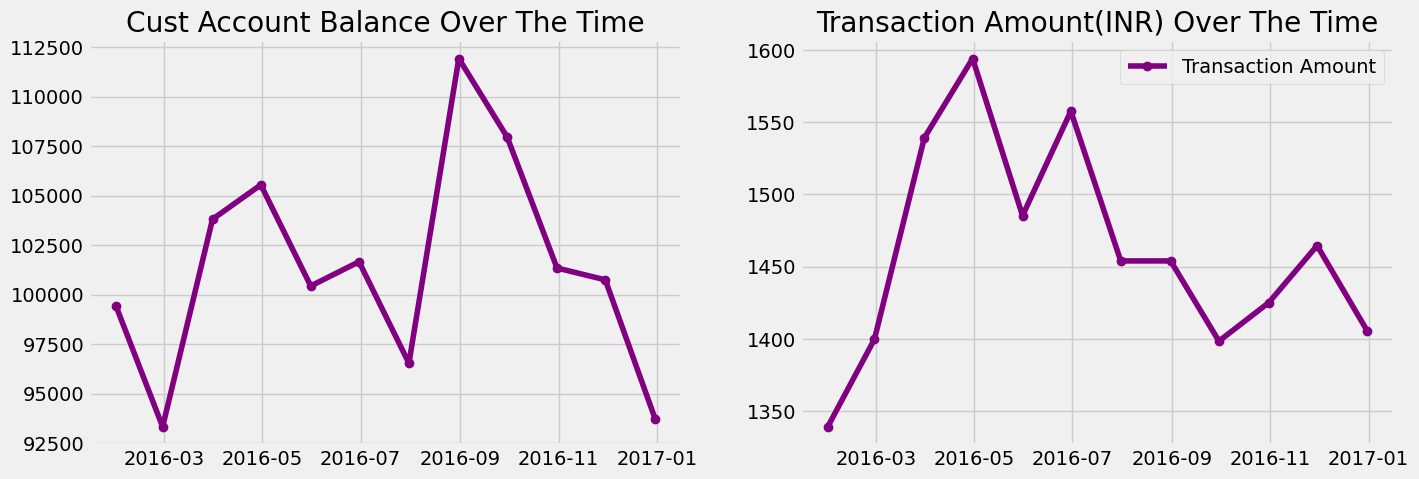

In [46]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
ax[0].plot(groupbby_month.index,groupbby_month['CustAccountBalance'],color='purple',marker='o',label='Customer Account Balance')
ax[0].set_title('Cust Account Balance Over The Time')
ax[1].plot(groupbby_month.index,groupbby_month['TransactionAmount'],color='purple',marker='o',label='Transaction Amount')
ax[1].set_title("Transaction Amount Over The Time")
plt.legend();